In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Download Fashion-MNIST files from github: https://github.com/golbin/TensorFlow-MNIST/tree/master/mnist/data
"C:\Users\thesk\eclipse-workspace\t10k-images.idx3-ubyte"
"C:\Users\thesk\eclipse-workspace\train-labels.idx1-ubyte"
"C:\Users\thesk\eclipse-workspace\train-images.idx3-ubyte"
"C:\Users\thesk\eclipse-workspace\t10k-labels.idx1-ubyte"

In [11]:
# Read training labels
with open(r"C:\Users\thesk\eclipse-workspace\train-labels.idx1-ubyte", 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

# Read training images
with open(r"C:\\Users\thesk\eclipse-workspace\train-images.idx3-ubyte", 'rb') as imgpath:
    X_train = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(y_train), 28, 28)

# Read test labels
with open(r"C:\\Users\thesk\eclipse-workspace\t10k-labels.idx1-ubyte", 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

# Read test images
with open(r"C:\Users\thesk\eclipse-workspace\t10k-images.idx3-ubyte", 'rb') as imgpath:
    X_test = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(y_test), 28, 28)

Epoch 1/5, Loss: 0.07400751858949661
Epoch 2/5, Loss: 0.04290781542658806
Epoch 3/5, Loss: 0.10275109112262726
Epoch 4/5, Loss: 0.07777770608663559
Epoch 5/5, Loss: 0.06423726677894592
Accuracy: 95.53%


RuntimeError: Numpy is not available

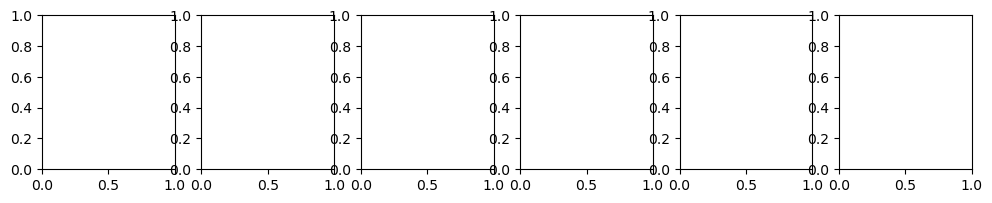

In [14]:
# Convert numpy arrays to PyTorch tensors
# PyTorch Tensors: These are multi-dimensional arrays provided by the PyTorch library, similar to NumPy arrays but optimized for deep learning tasks. 
# unsqueeze(1): Adds an extra dimension to the tensor as PyTorch expects image data to have a shape of [batch_size, channels, height, width]. For grayscale images like Fashion MNIST, channels is 1.
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
# TensorDataset: This utility from PyTorch wraps PyTorch tensors into a dataset, so they can be accessed like a regular dataset object.
# X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor: PyTorch tensors containing the training and testing data and labels, respectively.
# X_train_tensor and X_test_tensor contain the features (e.g., images, numerical data, etc.).
#y_train_tensor and y_test_tensor contain the labels (e.g., the class or target values for each sample).
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(pytorch_tensor) #Displays the PyTorch tensor

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

# Visualize some predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Use next() function
output = model(images)
_, preds = torch.max(output, 1)

fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Pred: {preds[i].item()}")
    ax.axis('off')
plt.show()

In [4]:
import numpy as np
print(np.__version__)

1.21.5
